Project Start Date: 17th December 2020 <br> <br>

Data Sources <br>
https://www.kaggle.com/usaf/world-war-ii/notebooks <br> 
https://www.kaggle.com/smid80/weatherww2/data <br>

**Aim of this project** <br>
Aerial Bombing Operations in WW2 - Bombing operations data <br>

This dataset consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.

Since our project team did not participate in planning the study or data collection, it is possible that we are missing crucial context which could render our conclusions invalid. <br>

Weather Conditions in WW2 (Weather Stations / Weather Conditions) <br>
The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

**Objectives & Hypothesises to Test (max. 10)** <br>
<u>Exploratory Analysis</u>
- Is this a Global study? What are the locations associated with the experiment?
- High level discriptive statistics 
- Do any values look to be recorded to accommodate missing values? e.g. 999, 9999 etc.
- Assessment of feature distributions
https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052
- Assessment of feature relationships:
    - It is expected that average temperatures are colder in winter months than summer months
    - It is expected that more snowfall occurs in the winter months (for northern hemisphere regions)
    - It is expected that more Precipitation occurs in the winter months (for northern hemisphere)
    - It is expected that lower temperatures correlate with higher snowfall and precipation 
    - It is expected that higher levels above the sea have greater precipation
    - It is expected that the accuracy of recordings based on stations may not be uniform (outlier detection)
<br>

<u>Statistical Model/Machine Learning Applications</u>
- Is there a relationship between the daily minimum and maximum temperature (TimeSeries Analysis)? 
- Predict the average temperature based on the independent variables given
- Can you predict the maximum temperature given the minimum temperature (GLM Models & Bayesian Versions)?
- Plot learning curves to deduce high bias/high variance and conclude what means could be applied to solve these issues

**Analysis regarding Data Quality** <br>
- Understanding of the sampling procedure <br>
- Potential biases <br> 
- Real-world actions that generated the data you inherited <br>

**Applications of Data Science Applied** <br>
- Explain the train/test split
- Explain appropriate error metric
- Explain class balance and any required action
- Explain what features are developed and transformations applied
- Explain if the model is exhibiting high bias or high variance and how this can be improved
- Explain where the model seems to perform poorly - In what situations does the model make mistakes?

**Additional Learning notes and next steps** <br>

In [1]:
# Package Requirements
import os

# Data Wrangling
import pandas as pd
import numpy as np
import datetime 

# Data Exploration and Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


Bad key text.latex.unicode in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 426 ('nbagg.transparent: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotli

In [2]:
os.getcwd()

'/Users/Rej1992/Documents/GitHub/RegressionModels/notebooks'

In [3]:
aerial_bombing_data = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/ww2_boming_operations.csv')
weather_summary = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/WeatherTempPrediction.csv')
weather_station_location = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/WeatherStationLocations.csv')

data_list = []
data_list.append(aerial_bombing_data)
data_list.append(weather_summary)
data_list.append(weather_station_location)

In [4]:
# State the assumptions you’re being forced to make.
# Write up caveat notes to be included in the appendix of your final report
# Write cautionary notes that warn the decision-maker (and your other readers) that conclusions from the study will 
# need to be downgraded due to potential data issues

In [5]:
for i in data_list:
    print("Dataframe Dimensions")
    print(i.shape)
    print("")

    print("Dataframe Columns and respective types")
    print(i.dtypes)
    print("")

    print("Percentage of Missing Data")
    print(i.isnull().sum() * 100 / len(i))
    
    print("")

Dataframe Dimensions
(178281, 46)

Dataframe Columns and respective types
Mission ID                                 int64
Mission Date                              object
Theater of Operations                     object
Country                                   object
Air Force                                 object
Unit ID                                   object
Aircraft Series                           object
Callsign                                  object
Mission Type                              object
Takeoff Base                              object
Takeoff Location                          object
Takeoff Latitude                          object
Takeoff Longitude                        float64
Target ID                                 object
Target Country                            object
Target City                               object
Target Type                               object
Target Industry                           object
Target Priority                           ob

## Data Analysis
- Data visualization of features
- Handling categorical data
- Encoding class labels
- Normalization and standardization of features
- Dimensionality Reduction
- Data partitioning into training, validation and testing sets

In [6]:
# Investiage options to link the dataframes with a unique key: weather_summary and weather_station_location look to be 
# connected via STA and WBAN respectively 
def uncommon_elements(list1, list2):
    ## Add something clever so the look up is always against the set with the largest number of unique records
    
    return [element for element in list2 if element not in list1]

STA = set(weather_summary.STA)
print(len(STA))

WBAN = set(weather_station_location.WBAN)
print(len(WBAN))

print('Sets are of the same data type: ', type(weather_summary.STA) == type(weather_station_location.WBAN))

print('Stations that are uncommon across both sets: ', uncommon_elements(STA, WBAN))

159
161
Sets are of the same data type:  True
Stations that are uncommon across both sets:  [15605, 15604]


In [7]:
combined_data = pd.merge(weather_summary, 
                         weather_station_location, 
                         how = 'inner', # takes care of only keeping records in both sets
                         left_on='STA',
                         right_on='WBAN')

print(len(combined_data))

119040


## Columns for Combined Data
**STA**
- STA: represent the Weather Station
- Not all STA codes represent the same time frequency 

**Date** 
- Date has been split into DA MO and YR respectively, note the century has been dropped when recording the YR

**Precip** 
- Precipitation in mm. This consists of numerical values and 'T' for 16,754 entries. This looks to be a mistake in the data collection (Impute precip == 0 for these cases)

**MaxTemp and MinTemp** 
- These are features that have been transformed into celcius from fahrenheit readings MAX/MIN and these have been recorded to 6 decimal places. The degrees celcius value has additionally been converted to an average. Using celcius will have a smaller range than the fahrenheit records. Patterns may be more easily seen based fahrenheit columns 

**MEA** 
- This is the mean for the fahrenheit MAX / MIN columns and this has been rounded to 1 d.p. Drop this columns and calculate the extact mean value

**Snowfall**
- This looks to be measures in terms of the amount of snow that fell in mm. The units are not obvious so there are two options
- Either assume the units are centiments by attempting to research more about the data OR normalise all the columns so they are on the same scale

**SNF**
 - After research it is unclear what SNF relates too and seems to gave a range of 0 - 3.4 (Agree to remove)

**PRCP**
- This column looks to have been scaled by a factor of 1/25.4*Precip (Agree to remove)

**TSHDSBRSGF**
- This is a repeat for PoorWeather so can be removed

**WBAN**
- Same as STA, representing the Weather Station
- Not all Weather Stations are located in the USA (unique STATE/COUNTRY ID = 63)
- This will be duplicated due to the merge so can be removed 

**NAME**
- This is the name of the weather station. It has a many:1 relationship with State/Country ID i.e. more than one station can be present per country 

**STATE/COUNTRY ID**
- This is the location of the weather station at state/country level

**LAT**
- This is the decimal latitude in string format 

**LON**
- This is the decimal latitude in string format 

**ELEV**
- Explanation not given - Expected to be level above the sea 
- Note that an elevation of 9999 means unknown

**Latitude**
- This is the decimal latitude calculated from the LAT/LON provided (use this over string as in format for ML)

**Longitude**
- This is the decimal longitude calculated from the LAT/LON provided (use this over string as in format for ML)

### Data Cleaning - Remove duplicate Rows & Columns
- Remove all columns that exhibit over 90% missing values
- Remove celcius columns 'MaxTemp', 'MinTemp', 'MeanTemp' and 'MEA'
- Remove duplicated/scaled columns: 'PRCP', 'TSHDSBRSGF'
- Remove PoorWeather for the inital analysis as unclear how the data has been recorded 
- Remove LAT as string format
- Remove LON as string format
- Remove those columns with zero variance
- Remove duplicated rows

In [8]:
# Handling missing data - Remove any columns with over 90% missing data 
def remove_missing_values(data, thresold_limit = 0.9):
    
    return data.loc[:, data.isnull().sum() < thresold_limit*data.shape[0]]

combined_data = remove_missing_values(combined_data)

# Remove additional columns based on explanation above
combined_data.drop(['MaxTemp', 
                    'MinTemp', 
                    'MeanTemp', 
                    'MEA', 
                    'PoorWeather', 
                    'TSHDSBRSGF', 
                    'PRCP', 
                    'SNF', 
                    'WBAN',
                    'LAT', 
                    'LON'], axis=1, inplace=True)

# Data Quality Expectations: Test for zero variance 
combined_data = combined_data.loc[:, combined_data.apply(pd.Series.nunique) != 1]

# Data Quality Expectations: Duplicated Records
print('Duplicated rows for index: ', combined_data[combined_data.duplicated()].index)
#print(len(combined_data))
combined_data = combined_data.drop_duplicates()
#print(len(combined_data))

Duplicated rows for index:  Int64Index([94660, 94661, 94662, 94663, 94664, 94665, 94666, 94667, 94668,
            94669],
           dtype='int64')


### Data Cleaning - Correct Data Types and Imputation of Missing Values

In [9]:
# Correct Date
weather_summary.Date = pd.to_datetime(weather_summary['Date'], format = '%Y-%m-%d')

# Correct Object Types
weather_summary.STA = weather_summary['STA'].astype('object')
weather_summary.YR = weather_summary['YR'].astype('object')
weather_summary.MO = weather_summary['MO'].astype('object')
weather_summary.DA = weather_summary['DA'].astype('object')

# Deal with Missing/Inaccurate values and correct data types 
weather_summary.Precip = np.where((weather_summary.Precip == 'T') | (weather_summary.Precip == ' '), 0, weather_summary.Precip)
weather_summary.Precip = weather_summary['Precip'].astype('float')

weather_summary.SNF = np.where((weather_summary.SNF == 'T') | (weather_summary.SNF == ' '), 0, weather_summary.SNF)
weather_summary.SNF = weather_summary['SNF'].astype('float')

# Check if any features are transformations of each other 

### Exploratory Data Analysis 
**Hypothesis & Expectations to Test**
- Is this a Global study? What are the locations associated with the experiment?
- High level discriptive statistics 
- Do any values look to be recorded to accommodate missing values? e.g. 999, 9999 etc.
- Assessment of feature distributions
https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052
- Assessment of feature relationships:
    - It is expected that average temperatures are colder in winter months than summer months
    - It is expected that more snowfall occurs in the winter months (for northern hemisphere regions)
    - It is expected that more Precipitation occurs in the winter months (for northern hemisphere)
    - It is expected that lower temperatures correlate with higher snowfall and precipation 
    - It is expected that higher levels above the sea have greater precipation
    - It is expected that the accuracy of recordings based on stations may not be uniform (outlier detection)

In [10]:
combined_data

,STA,Date,Precip,Snowfall,YR,MO,DA,MAX,MIN,NAME,STATE/COUNTRY ID,ELEV,Latitude,Longitude
0,10001,1942-7-1,1.016,0,42,7,1,78.0,72.0,ACCRA,GH,62,5.600000,-0.300000
1,10001,1942-7-2,0,0,42,7,2,84.0,71.0,ACCRA,GH,62,5.600000,-0.300000
2,10001,1942-7-3,2.54,0,42,7,3,79.0,72.0,ACCRA,GH,62,5.600000,-0.300000
3,10001,1942-7-4,2.54,0,42,7,4,80.0,72.0,ACCRA,GH,62,5.600000,-0.300000
4,10001,1942-7-5,0,0,42,7,5,80.0,71.0,ACCRA,GH,62,5.600000,-0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,0,45,12,27,83.0,65.0,BRISBANE,AU,2,-27.433333,153.133333
119036,82506,1945-12-28,9.906,0,45,12,28,85.0,65.0,BRISBANE,AU,2,-27.433333,153.133333
119037,82506,1945-12-29,0,0,45,12,29,83.0,65.0,BRISBANE,AU,2,-27.433333,153.133333
119038,82506,1945-12-30,0,0,45,12,30,83.0,65.0,BRISBANE,AU,2,-27.433333,153.133333


In [11]:
pd.crosstab(combined_data['NAME'], combined_data['STATE/COUNTRY ID'])

STATE/COUNTRY ID,AL,AT,AU,AZ,BA,BE,BN,BR,BZ,CS,...,PR,SG,SO,SP,TD,TI,TO,TS,TU,UK
NAME,,,,,,,,,,,,,,,,,,,,,
ABADAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACCRA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADANA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,263,0
AGRA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIN EL,383,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WALLER/BWI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1631,0,0,0,0,0
WARRINGTON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,295
WHEELER/AFB 810.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Write clean data to 02_intermediate data folder
#weather_summary.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/data_cleaning.csv')

### Data Cleaning - Feature Engineering

In [13]:
#weather_summary = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/data_cleaning.csv')

In [14]:
# Calculate the average based on the fahrenheit columns
weather_summary['MeanTemp_F'] = (weather_summary['MAX'] + weather_summary['MIN'])/2

# Create a simplier binary feature for snowfall occurrence
weather_summary['Snowfall_bin'] =  np.where(weather_summary.Snowfall.isnull(), 0, 1)

# Add full state names to the analysis

STATES_TUPLE = [("AL","Alabama"),
                ("AK","Alaska"),
                ("AZ","Arizona"),
                ("AR","Arkansas"),
                ("CA", "California"),
                ("CO", "Colorado"),
                ("CT","Connecticut"),
                ("DC","Washington DC"),
                ("DE","Delaware"),
                ("FL","Florida"),
                ("GA","Georgia"),
                ("HI","Hawaii"),
                ("ID","Idaho"),
                ("IL","Illinois"),
                ("IN","Indiana"),
                ("IA","Iowa"),
                ("KS","Kansas"),
                ("KY","Kentucky"),
                ("LA","Louisiana"),
                ("ME","Maine"),
                ("MD","Maryland"),
                ("MA","Massachusetts"),
                ("MI","Michigan"),
                ("MN","Minnesota"),
                ("MS","Mississippi"),
                ("MO","Missouri"),
                ("MT","Montana"),
                ("NE","Nebraska"),
                ("NV","Nevada"),
                ("NH","New Hampshire"),
                ("NJ","New Jersey"),
                ("NM","New Mexico"),
                ("NY","New York"),
                ("NC","North Carolina"),
                ("ND","North Dakota"),
                ("OH","Ohio"),
                ("OK","Oklahoma"),
                ("OR","Oregon"),
                ("PA","Pennsylvania"),
                ("RI","Rhode Island"),
                ("SC","South Carolina"),
                ("SD","South Dakota"),
                ("TN","Tennessee"),
                ("TX","Texas"),
                ("UT","Utah"),
                ("VT","Vermont"),
                ("VA","Virginia"),
                ("WA","Washington"),
                ("WV","West Virginia"),
                ("WI","Wisconsin"),
                ("WY","Wyoming")]


# Add sine and cos features for seasonal elements 

In [15]:
# Write clean data to 02_intermediate data folder
weather_summary.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/data_std_feature_eng.csv')

# Save the features to a pickle file


#weather_summary_tm.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/data_tm_feature_eng.csv')

<AxesSubplot:>

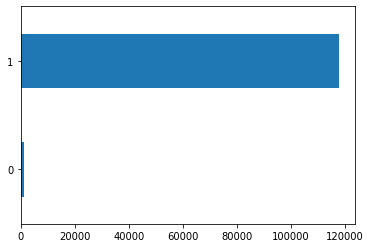

In [16]:
weather_summary['Snowfall_bin'].value_counts().sort_values().plot(kind = 'barh')

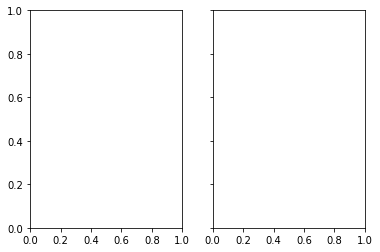

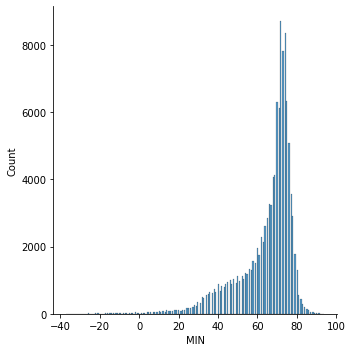

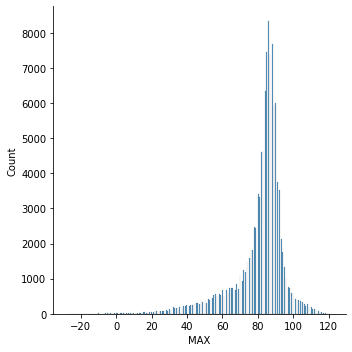

In [17]:
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.displot(weather_summary, x="MIN", ax=ax1)
sns.displot(weather_summary, x="MAX", ax=ax2)

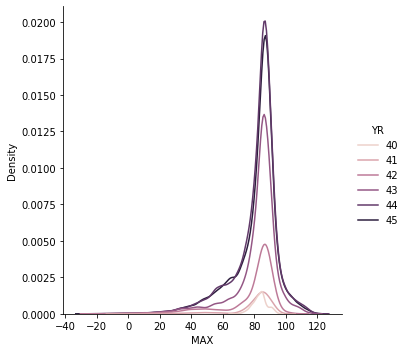

In [18]:
sns.displot(weather_summary, x="MAX", hue="YR", kind="kde")

In [19]:
weather_summary[weather_summary['STA'] == 10001]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE,MeanTemp_F,Snowfall_bin
0,10001,1942-07-01,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,1
1,10001,1942-07-02,0.000,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.5,1
2,10001,1942-07-03,2.540,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
3,10001,1942-07-04,2.540,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1
4,10001,1942-07-05,0.000,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,10001,1945-08-27,0.000,NaN,28.333333,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,1
1153,10001,1945-08-28,13.970,NaN,27.222222,22.222222,24.444444,0,1,45,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,76.5,1
1154,10001,1945-08-29,3.048,NaN,26.111111,22.222222,24.444444,0,1,45,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,75.5,1
1155,10001,1945-08-30,0.000,NaN,27.777778,22.777778,25.555556,0,1,45,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,77.5,1


**Data Analysis & Visualization of features**
- Timeseries Dataframe: weather_summary_tm

In [20]:
## Sort the data into date order and reset index
## Create a new timeseries dataframe 
weather_summary.set_index('Date', drop=True, inplace=True)
weather_summary

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE,MeanTemp_F,Snowfall_bin
Date,,,,,,,,,,,,,,,,,,,,,
1942-07-01,10001,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,1
1942-07-02,10001,0.000,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.5,1
1942-07-03,10001,2.540,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
1942-07-04,10001,2.540,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1
1942-07-05,10001,0.000,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945-12-27,82506,0.000,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,1
1945-12-28,82506,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,12,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,75.0,1
1945-12-29,82506,0.000,NaN,28.333333,18.333333,23.333333,0,1,45,12,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,74.0,1


In [21]:
# Annual Analysis


In [22]:
# Monthly Analysis


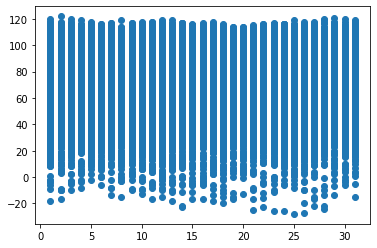

In [23]:
# Daily Analysis
plt.scatter(weather_summary.DA, weather_summary.MAX)

In [24]:
# ## TimeSeries Analysis 
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.lineplot(x='Date', 
#              y='MIN', 
#              data=weather_summarytrans, 
#              hue='STA'); # ';' is to avoid extra message before plot

In [25]:
weather_summary

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE,MeanTemp_F,Snowfall_bin
Date,,,,,,,,,,,,,,,,,,,,,
1942-07-01,10001,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,1
1942-07-02,10001,0.000,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.5,1
1942-07-03,10001,2.540,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
1942-07-04,10001,2.540,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1
1942-07-05,10001,0.000,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945-12-27,82506,0.000,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,1
1945-12-28,82506,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,12,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,75.0,1
1945-12-29,82506,0.000,NaN,28.333333,18.333333,23.333333,0,1,45,12,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,74.0,1


### Weather Location Analysis

**Hypothesis & Expectations to Test**
- What are the locations associated with the study?


In [26]:
weather_station_location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [27]:
weather_station_location['STATE/COUNTRY ID'].unique()

array(['AL', 'AT', 'AU', 'AZ', 'BA', 'BE', 'BN', 'BR', 'BZ', 'CS', 'CT',
       'CU', 'DR', 'DY', 'EG', 'EQ', 'ER', 'ET', 'FJ', 'FR', 'GH', 'GL',
       'GR', 'GU', 'GY', 'HA', 'HI', 'IL', 'IN', 'IQ', 'IR', 'IY', 'JM',
       'JP', 'KO', 'KU', 'LC', 'LI', 'LY', 'MC', 'MT', 'NG', 'NH', 'NI',
       'NK', 'NU', 'NZ', 'OM', 'PF', 'PH', 'PI', 'PK', 'PM', 'PQ', 'PR',
       'SG', 'SO', 'SP', 'TD', 'TI', 'TO', 'TS', 'TU', 'UK'], dtype=object)

In [28]:
SuspiciousTests_Test = pd.DataFrame(columns = ['Filename', 'Test Parameters', 'Code', 'Value'])

In [29]:
initial_min_temperature = Data.loc[0, 'Average Tank Temperature (deg F)']
initial_max_temperature = Data.loc[0, 'Average Tank Temperature (deg F)']

final_min_temperature = Data.loc[Data.index.max(), 'Average Tank Temperature (deg F)']
final_max_temperature = Data.loc[Data.index.max(), 'Average Tank Temperature (deg F)']

min_temperature = Data['T_Amb (deg F)'].min()
max_temperature = Data['T_Amb (deg F)'].max()

min_temperature_sd = Data['T_Amb (deg F)'].sd()
max_temperature_sd = Data['T_Amb (deg F)'].sd()

min_temperature_avg = Data['T_Amb (deg F)'].mean()
max_temperature_avg = Data['T_Amb (deg F)'].mean()

min_temperature_median
max_temperature_median

min_temperature_mode
max_temperature_mode

NameError: name 'Data' is not defined

## Model Building 
- Select the model that you would like to use
- Hyperparameter tuning is used to fine-tune the model in order to prevent overfitting 
- Cross-validation is performed to ensure the model performs well on the validation set 
- Model is applied to the test data set
- Save the trained model to a pickle file

## Application